In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from sklearn import svm 

dataset = pd.read_csv("../data/trees.csv")

print(dataset.head())

leaf_width  leaf_length  trunk_girth  trunk_height  tree_type
0        5.13         6.18         8.26          8.74          0
1        7.49         4.02         8.07          6.78          0
2        9.22         4.16         5.46          8.45          1
3        6.98        11.10         6.96          4.06          2
4        3.46         5.19         8.72         10.40          0


No handles with labels found to put in legend.


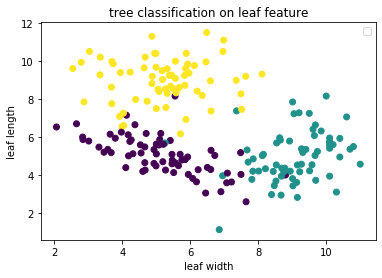

In [6]:
features = dataset.drop(['tree_type'],axis=1)
label = np.array(dataset['tree_type'])

X = features['leaf_width']
Y = features['leaf_length']
color = label
plt.scatter(X,Y,c=color)
plt.title("tree classification on leaf feature")
plt.xlabel('leaf width')
plt.ylabel('leaf length')
plt.legend()
plt.show()

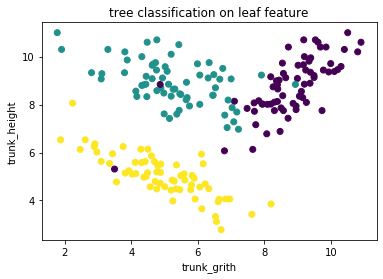

In [8]:
#another feature graph
plt.scatter(features['trunk_girth'],features['trunk_height'],c=color)
plt.title("tree classification on leaf feature")
plt.xlabel('trunk_grith')
plt.ylabel('trunk_height')
plt.show()

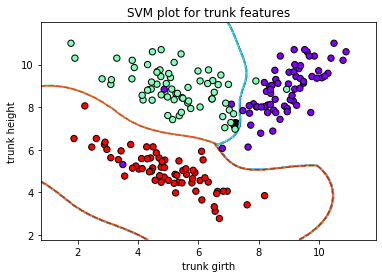

In [51]:
#model and svm
feature1 = features['trunk_girth'].values
feature2 = features['trunk_height'].values

train_X = np.asarray([feature1,feature2]).transpose()
train_Y = label
model = svm.SVC().fit(train_X,train_Y)
X_min,X_max = train_X[:,0].min() - 1 , train_X[:,0].max() + 1
Y_min,Y_max = train_X[:,1].min() - 1, train_X[:,1].max() + 1
test_tree = {'leaf_width': 3 , 'leaf_length' : 4.11 , 'trunk_girth': 7.23 ,'trunk_height': 7.2}
#print ("min max x :  {0} {1} , min max y: {2} {3}".format(X_min,X_max,Y_min,Y_max))
XX,YY = np.meshgrid(np.arange(X_min,X_max,0.02),np.arange(Y_min,Y_max,0.02))
#prediction = model.predict(np.c_[XX.ravel(),YY.ravel()]).reshape(XX.shape)
prediction_hyperplane = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
plt.scatter(feature1,feature2,c=train_Y,cmap=plt.cm.rainbow,zorder=10,edgecolors='k',s=40 )
plt.scatter(test_tree['trunk_girth'],test_tree['trunk_height'],color='black',s=100)
plt.contour(XX,YY,prediction_hyperplane,cmap=plt.cm.rainbow,alpha =1.0)
plt.contour(XX,YY,prediction_hyperplane,colors='k',linestyles="--",alpha=0.05)
plt.title("SVM plot for trunk features")
plt.xlabel('trunk girth')
plt.ylabel('trunk height')
plt.show()


{'leaf_width': 3, 'leaf_length': 4.11, 'trunk_girth': 7.23, 'trunk_height': 7.2}


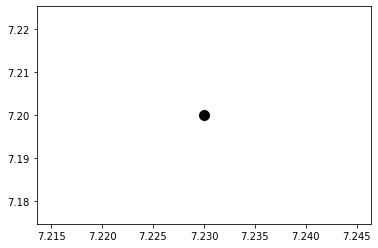

In [50]:
#predict with given point 
test_tree = {'leaf_width': 3 , 'leaf_length' : 4.11 , 'trunk_girth': 7.23 ,'trunk_height': 7.2}

print (test_tree)
plt.scatter(test_tree['trunk_girth'],test_tree['trunk_height'],color='black',s=100)
plt.show()
